In [34]:
import pandas as pd
# import geopandas as gpd
# import descartes
# from shapely.geometry import Point, Polygon
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("http://cluster.earlham.edu/~apc0013/Chicago_crime.csv")

In [3]:
pd.set_option('display.max_columns', 500)
df.head(2)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,2746413,HJ384532,05/20/2003 08:00:00 PM,072XX S FAIRFIELD AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,831,8.0,18.0,66.0,05,1159293.0,1856544.0,2003,02/28/2018 03:56:25 PM,41.762076,-87.691736,"(41.762075613, -87.691735556)"
1,2746414,HJ385055,05/24/2003 09:25:00 PM,015XX W ROOSEVELT RD,0420,BATTERY,AGGRAVATED:KNIFE/CUTTING INSTR,SIDEWALK,False,False,1231,12.0,2.0,28.0,04B,1166352.0,1894784.0,2003,02/28/2018 03:56:25 PM,41.866863,-87.664773,"(41.866863003, -87.664772948)"


In [26]:
month_crime = df[['Date', 'Primary Type', 'Year']]

In [27]:
month_crime['Month'] = month_crime['Date'].str.slice(0, 2)

/mnt/lovelace/software/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [32]:
month_crime.sort_values(by='Year', inplace = True)

/mnt/lovelace/software/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
# month_crime.replace({'Month': {'01': 'Jan', 
#                                   '02': 'Feb', 
#                                   '03': 'Mar', 
#                                   '04': 'Apr', 
#                                   '05': 'May', 
#                                   '06': 'Jun', 
#                                   '07': 'Jul', 
#                                   '08': 'Aug', 
#                                   '09': 'Sep', 
#                                   '10': 'Oct', 
#                                   '11': 'Nov', 
#                                   '12':'Dec'}}, inplace=True)

/mnt/lovelace/software/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:5821: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  regex=regex)


In [51]:
month_crime["Primary Type"].unique()

array(['ASSAULT', 'DECEPTIVE PRACTICE', 'CRIMINAL TRESPASS', 'NARCOTICS',
       'THEFT', 'OTHER OFFENSE', 'BATTERY', 'MOTOR VEHICLE THEFT',
       'WEAPONS VIOLATION', 'LIQUOR LAW VIOLATION', 'CRIMINAL DAMAGE',
       'PROSTITUTION', 'ROBBERY', 'BURGLARY', 'ARSON', 'KIDNAPPING',
       'SEX OFFENSE', 'INTIMIDATION', 'OFFENSE INVOLVING CHILDREN',
       'PUBLIC PEACE VIOLATION', 'STALKING', 'GAMBLING',
       'CRIM SEXUAL ASSAULT', 'INTERFERENCE WITH PUBLIC OFFICER',
       'RITUALISM', 'OTHER NARCOTIC VIOLATION', 'OBSCENITY',
       'PUBLIC INDECENCY', 'HOMICIDE', 'DOMESTIC VIOLENCE',
       'NON-CRIMINAL', 'HUMAN TRAFFICKING',
       'NON-CRIMINAL (SUBJECT SPECIFIED)', 'NON - CRIMINAL',
       'CONCEALED CARRY LICENSE VIOLATION'], dtype=object)

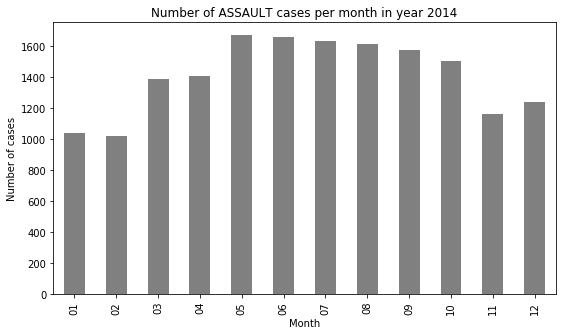

In [65]:
fig = plt.figure(figsize = (9, 5)) 
ax = fig.gca()

def plot_crime(t, y):
    ax.set_title("Number of " + t + " cases per month in year " + str(y))
    ax.set_ylabel("Number of cases")
    plt_data = month_crime.loc[(month_crime['Year'] == y) & (month_crime['Primary Type'] == t)]
    plt_data.groupby(['Month'])['Primary Type'].count().plot(kind ="bar", color = 'gray', ax = ax)

    
plot_crime("ASSAULT", 2014)



In [58]:
# plt_data = month_crime.loc[(month_crime['Year'] == 2003) & (month_crime['Primary Type'] == 'BURGLARY')]
# tmp = plt_data.groupby('Month')['Primary Type'].count()